### Homework 5 (Due July 17)
Data on weekly-averaged COVID-19 cases and weekly-averaged COVID-19-related deaths in Louisiana
are provided for each of the first three “waves”. For each wave, perform a lagged cross-correlation
analysis and find the lag of peak correlation. At the lag of peak correlation perform a linear regression
to determine the slope (=deaths/case) and its standard error.
• What is the lag of peak correlation in each wave?
• What are the value and standard error of the deaths/case slope in each wave?
• Comment on any differences in these values for different waves.

In [11]:
import pandas as pd
from scipy.signal import correlate, correlation_lags
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv(r'/Users/sushovanadhikari/Desktop/start_over_workspace/hw5/third_wave.csv')
print(df)

          date  wkly avg cases  wkly avg deaths
0    11/4/2020      528.714286        10.000000
1    11/5/2020      569.714286        10.285714
2    11/6/2020      632.142857        11.714286
3    11/7/2020      632.142857        11.714286
4    11/8/2020      660.000000        13.571429
..         ...             ...              ...
133  3/17/2021      358.285714        14.285714
134  3/18/2021      368.000000        13.714286
135  3/19/2021      319.142857        11.000000
136  3/20/2021      319.142857        11.000000
137  3/21/2021      218.857143         9.285714

[138 rows x 3 columns]


In [13]:
weekly_avg_cases = df['wkly avg cases']
weekly_avg_deaths = df['wkly avg deaths']
correlation = correlate(weekly_avg_cases, weekly_avg_deaths, mode='full')
lags = correlation_lags(weekly_avg_cases.size, weekly_avg_deaths.size, mode='full')
lag = lags[np.argmax(correlation)]
print(lag)

-9


In [14]:
x,y = None,None
if lag > 0:
    x = weekly_avg_cases[:-lag]
    y = weekly_avg_deaths[lag:]
else:
    x = weekly_avg_cases[-lag:]
    y = weekly_avg_deaths[:lag]

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(f'slope: {slope}, standard error: {std_err}')

slope: 0.005031133223025832, standard error: 0.0011711851733495718


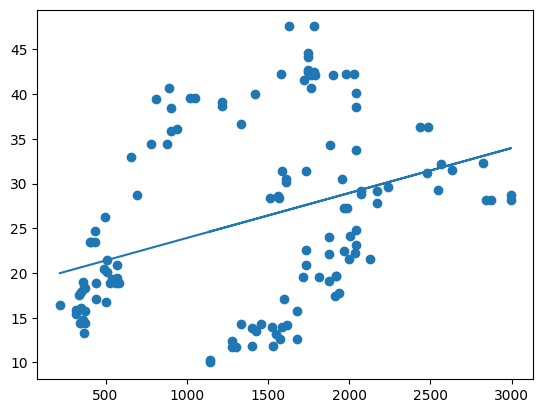

In [15]:
plt.scatter(x,y)
plt.plot(x, slope*x + intercept)
plt.show()